<a href="https://colab.research.google.com/github/ygmurkara/DI501/blob/main/Normalization%2C_Standardization_and_PCA_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="margin-bottom:0"><center>DI 501 - Introduction to Data Informatics</center></h1>
<h2 style="margin-top:0"><center>Normalization, Standardization and PCA Tutorial</center></h2>
<br>
<p style="margin-top:0"><center><b>This tutorial is prepared for Middle East Technical University's DI 501 - Introduction to Data Informatics course.</b></center></p>
<hr style="height:2px;color:navy;margin-top:0">
<p style="margin-top:0; text-align: justify; font-size:15px">Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors. The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization.</p>
<p style="margin-top:1; text-align: justify; font-size:15px">A common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice. </p>
<p style="margin-top:1; text-align: justify; font-size:15px">In this tutorial, we will have a look at how to implement normalization, standardization and PCA in python programming language. </p>

<h3 style="margin-bottom:0">1) Installation</h3>
<br>
<p style="margin-top:0; text-align: justify">We will be using scikit-learn library as it includes all necessary functions. To install it, you are required to have Python environment first. If you do not have Python, you are strongly recommended to have <a href="https://www.anaconda.com/">Anaconda</a> distribution as it is beginner friendly. </p>
<p style="margin-top:1; text-align: justify">If you have Python, you can proceed to install scikit-learn with the following code: </p>

In [ ]:
conda install scikit-learn

Retrieving notices: done
Channels:
 - defaults
Platform: osx-64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       hecd8cb5_0         131 KB
    openssl-3.0.16             |       h184c1cd_0         4.6 MB
    scikit-learn-1.6.1         |  py311h6d0c2b6_0         9.8 MB
    scipy-1.15.2               |  py311hff9f4a3_1        23.4 MB
    threadpoolctl-3.5.0        |  py311h85bffb1_0          50 KB
    ------------------------------------------------------------
                                           Total:        38.0 MB

The following packages will be UPDATED:

  ca-certificates                     2024.12.31-hecd8cb5_0 --> 2025.2.25-hecd8cb5_0 
  openssl                                 3.0.15-h46256e1_0 --> 3.0.16-h184c

or

In [ ]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


<h3 style="margin-bottom:0">2) Importing</h3>
<br>
<p style="margin-top:0; text-align: justify">To be able to use scikit-learn library, you first need to import it. However, generally we import individual functions from it as follows: </p>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#other useful libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

<h3 style="margin-bottom:0">3) Normalization</h3>

Normalization is a rescaling of the data from the original range so that all values are within the new range of 0 and 1.
A value is normalized as follows:

y = (x – min) / (max – min)

First, we create an numpy array and look at it, later we will work with real data.

In [ ]:
data = np.array([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
data

array([[1.0e+02, 1.0e-03],
       [8.0e+00, 5.0e-02],
       [5.0e+01, 5.0e-03],
       [8.8e+01, 7.0e-02],
       [4.0e+00, 1.0e-01]])

In [ ]:
normalizer = MinMaxScaler()
normalized = normalizer.fit_transform(data)
normalized

array([[1.        , 0.        ],
       [0.04166667, 0.49494949],
       [0.47916667, 0.04040404],
       [0.875     , 0.6969697 ],
       [0.        , 1.        ]])

<h3 style="margin-bottom:0">4) Standardization</h3>

Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1. A value is standardized as follows:

y = (x – mean) / standard_deviation

First, we create an numpy array and look at it, later we will work with real data.

In [ ]:
data = np.array([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
data

array([[1.0e+02, 1.0e-03],
       [8.0e+00, 5.0e-02],
       [5.0e+01, 5.0e-03],
       [8.8e+01, 7.0e-02],
       [4.0e+00, 1.0e-01]])

In [ ]:
standardizer = StandardScaler()
standardized = standardizer.fit_transform(data)
standardized

array([[ 1.26398112, -1.16389967],
       [-1.06174414,  0.12639634],
       [ 0.        , -1.05856939],
       [ 0.96062565,  0.65304778],
       [-1.16286263,  1.44302493]])

<h3 style="margin-bottom:0">5) Real Data Example</h3>

The sonar dataset is a standard machine learning dataset for binary classification.

It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced.

Input values are values retrieved from signal and target value is either 'R' (rock) or 'M' (mine).

First, import our dataset and look at it.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv", header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


We do not need labels to work use normalization or standardization, so we use first 60 columns only.

In [ ]:
data = data.iloc[:, :-1]

Now, let's look at histograms.

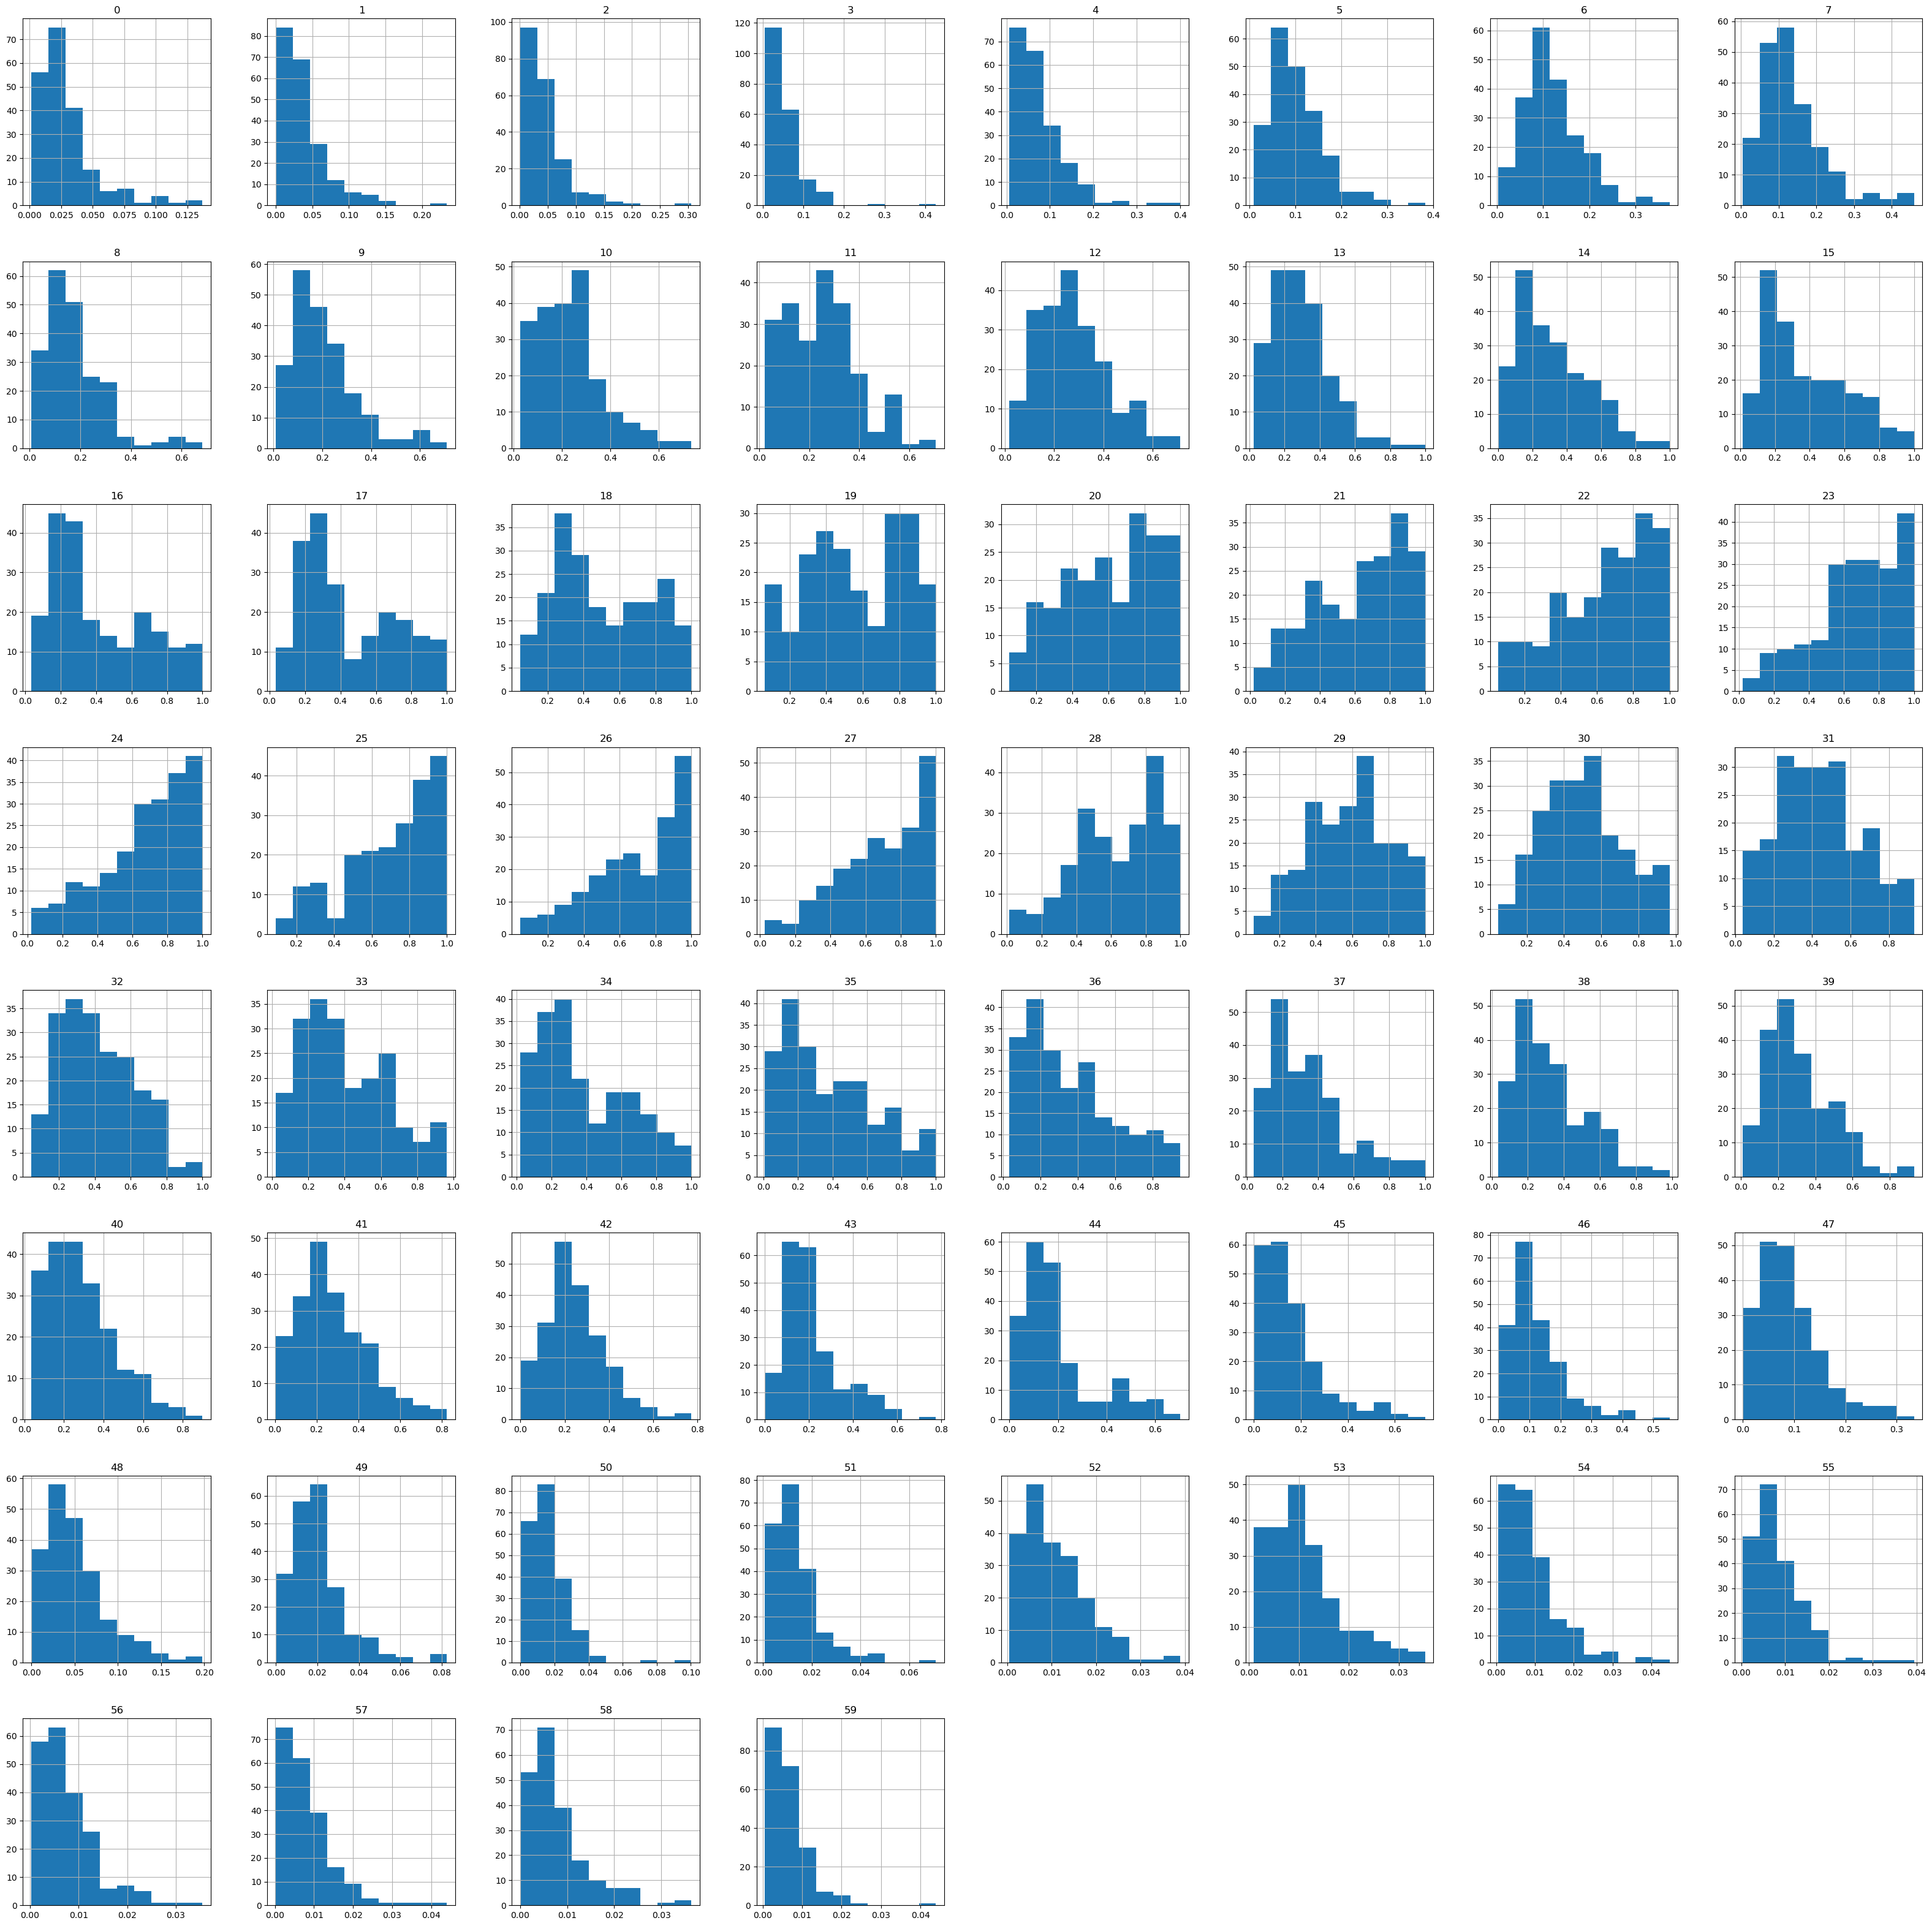

In [ ]:
data.hist(figsize=(40,40))
plt.show()

We will delve into how they can improve accuracy of machine learning algorithms once we learn about some of the algorithms. For now, we will learn how we implement them.

First, we can apply normalization.

In [ ]:
normalize = MinMaxScaler()
data = normalize.fit_transform(data)

Fit_transform creates a numpy array, to be able to draw histogram from pandas function, we need to first convert it into pandas dataframe.

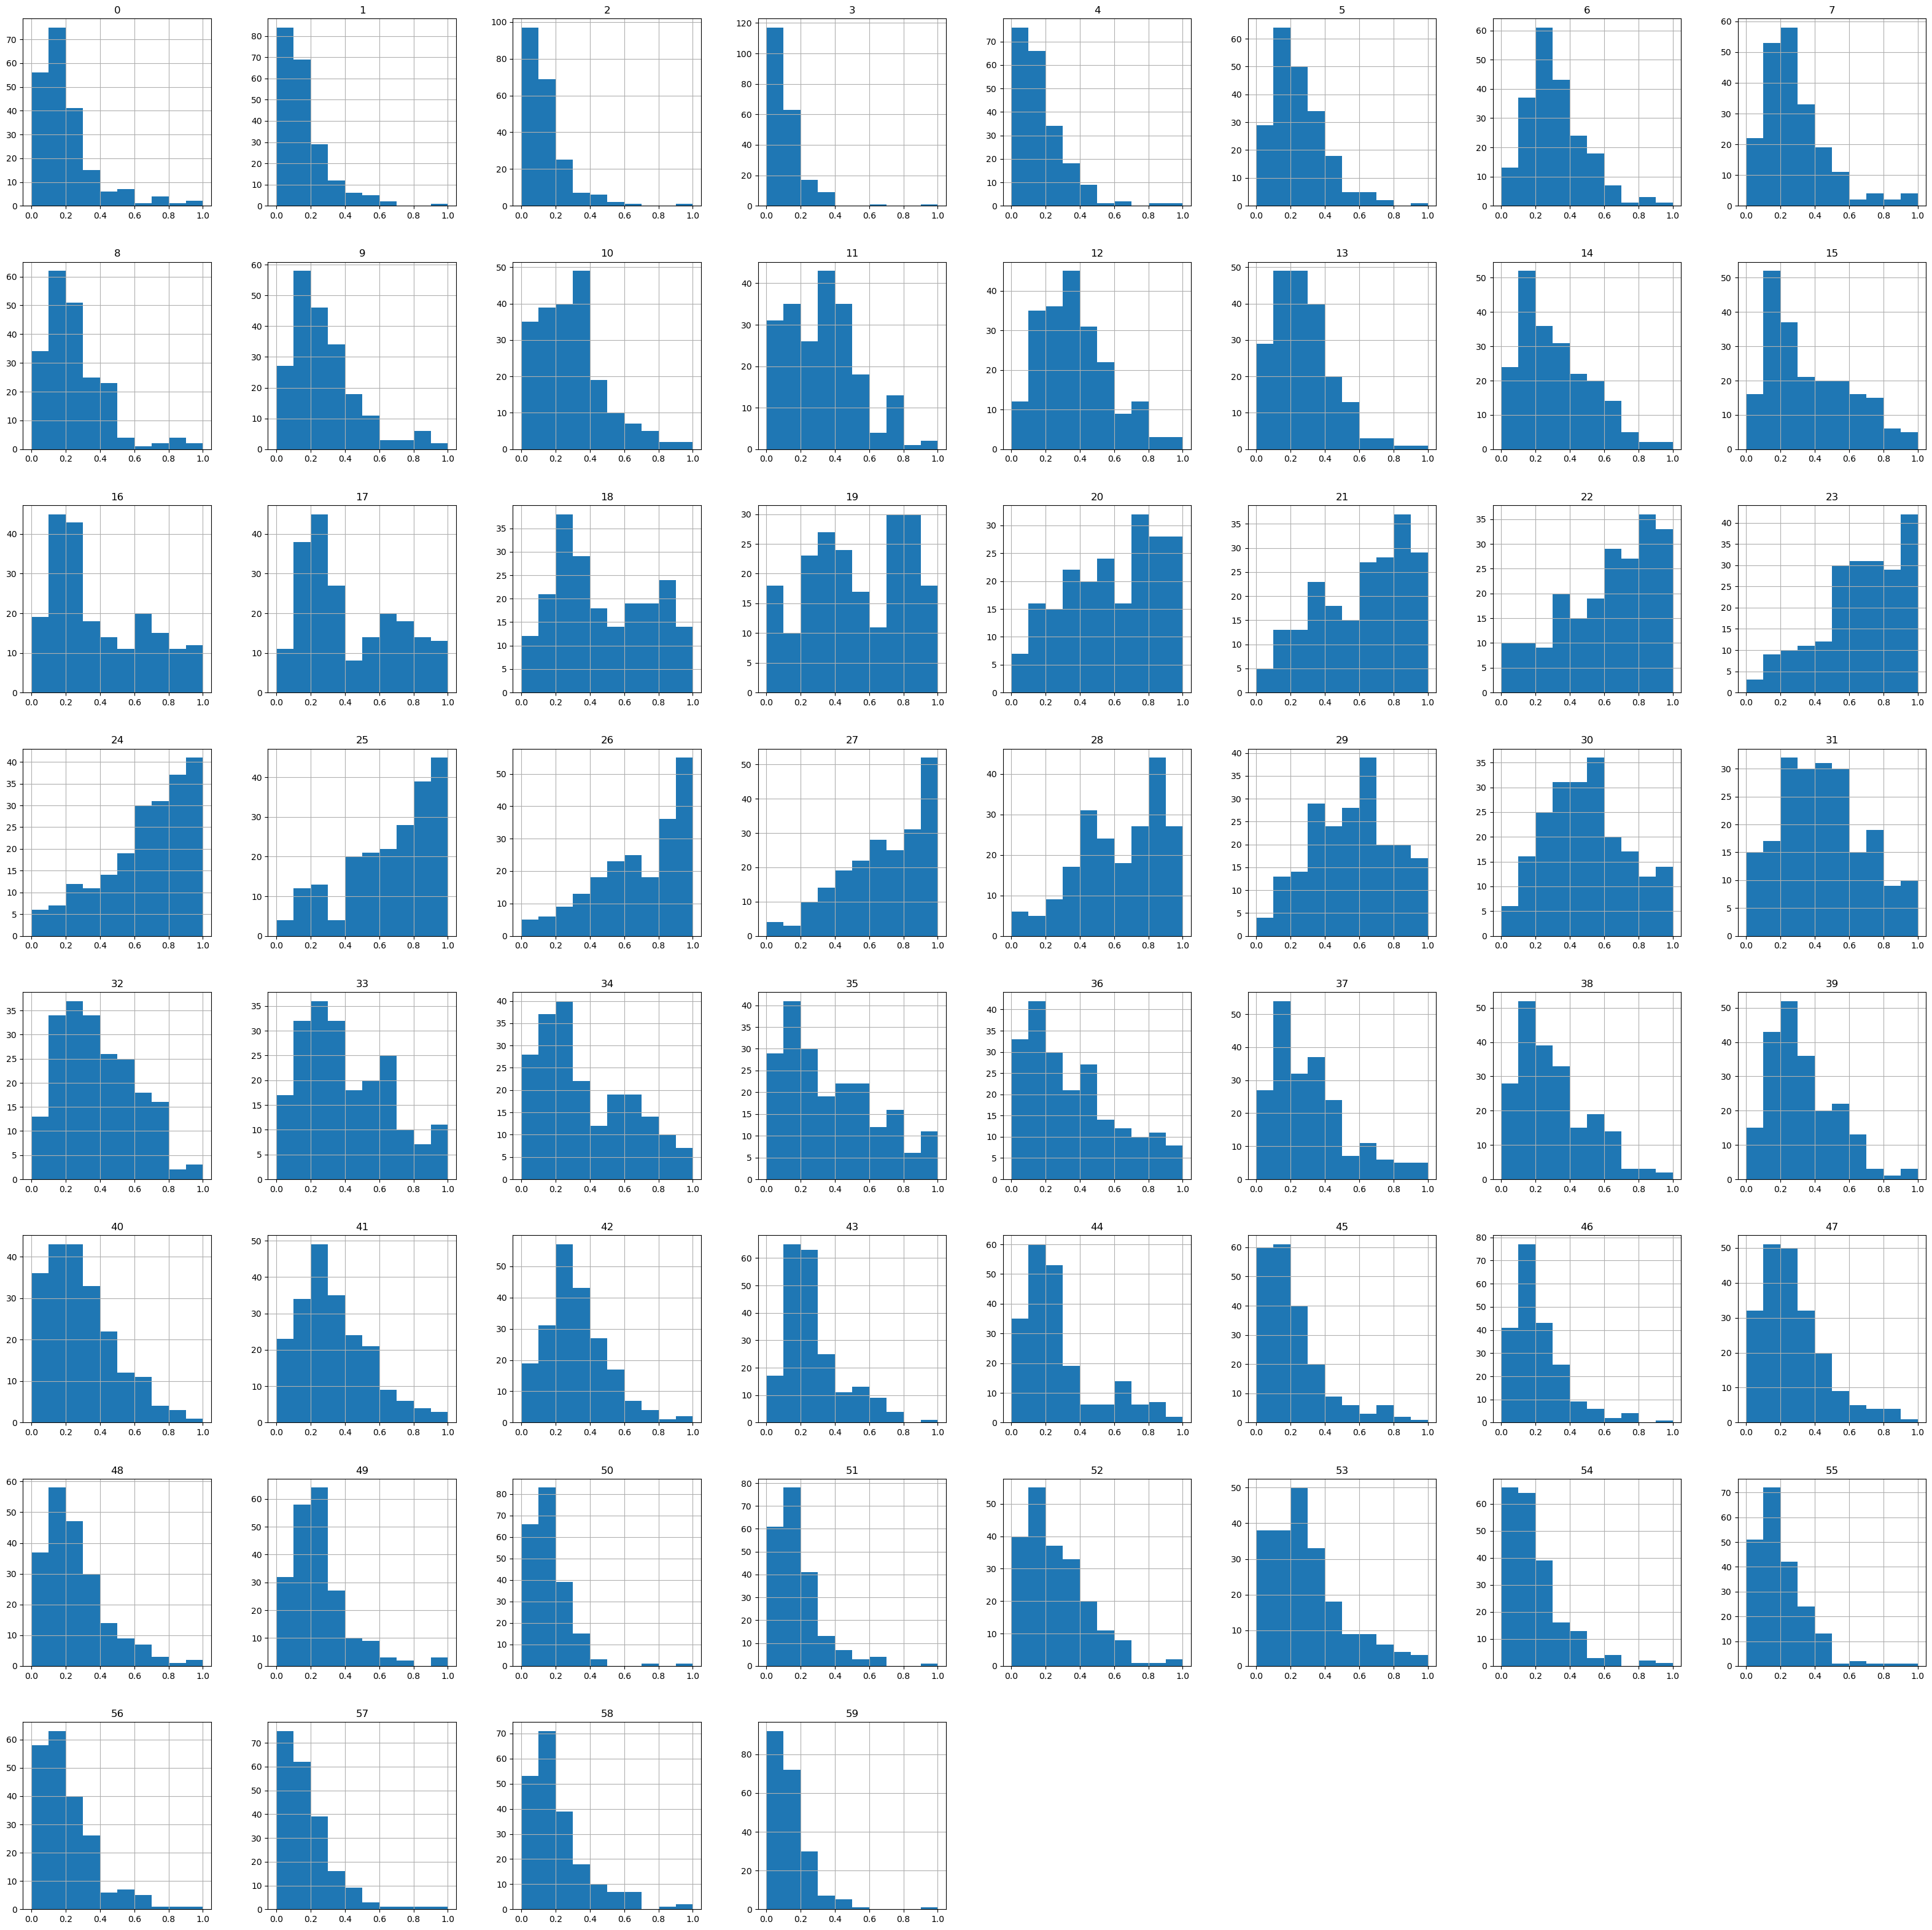

In [ ]:
data = pd.DataFrame(data, dtype="float")
data.hist(figsize=(40,40))
plt.show()

As you can see in x axis, all of the values are between 0 and 1.

Now, we can also apply standardization with the similar steps above.

In [ ]:
data2 = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv", header=None)
data2 = data2.iloc[:, :-1]

standardize = StandardScaler()
data2 = standardize.fit_transform(data2)

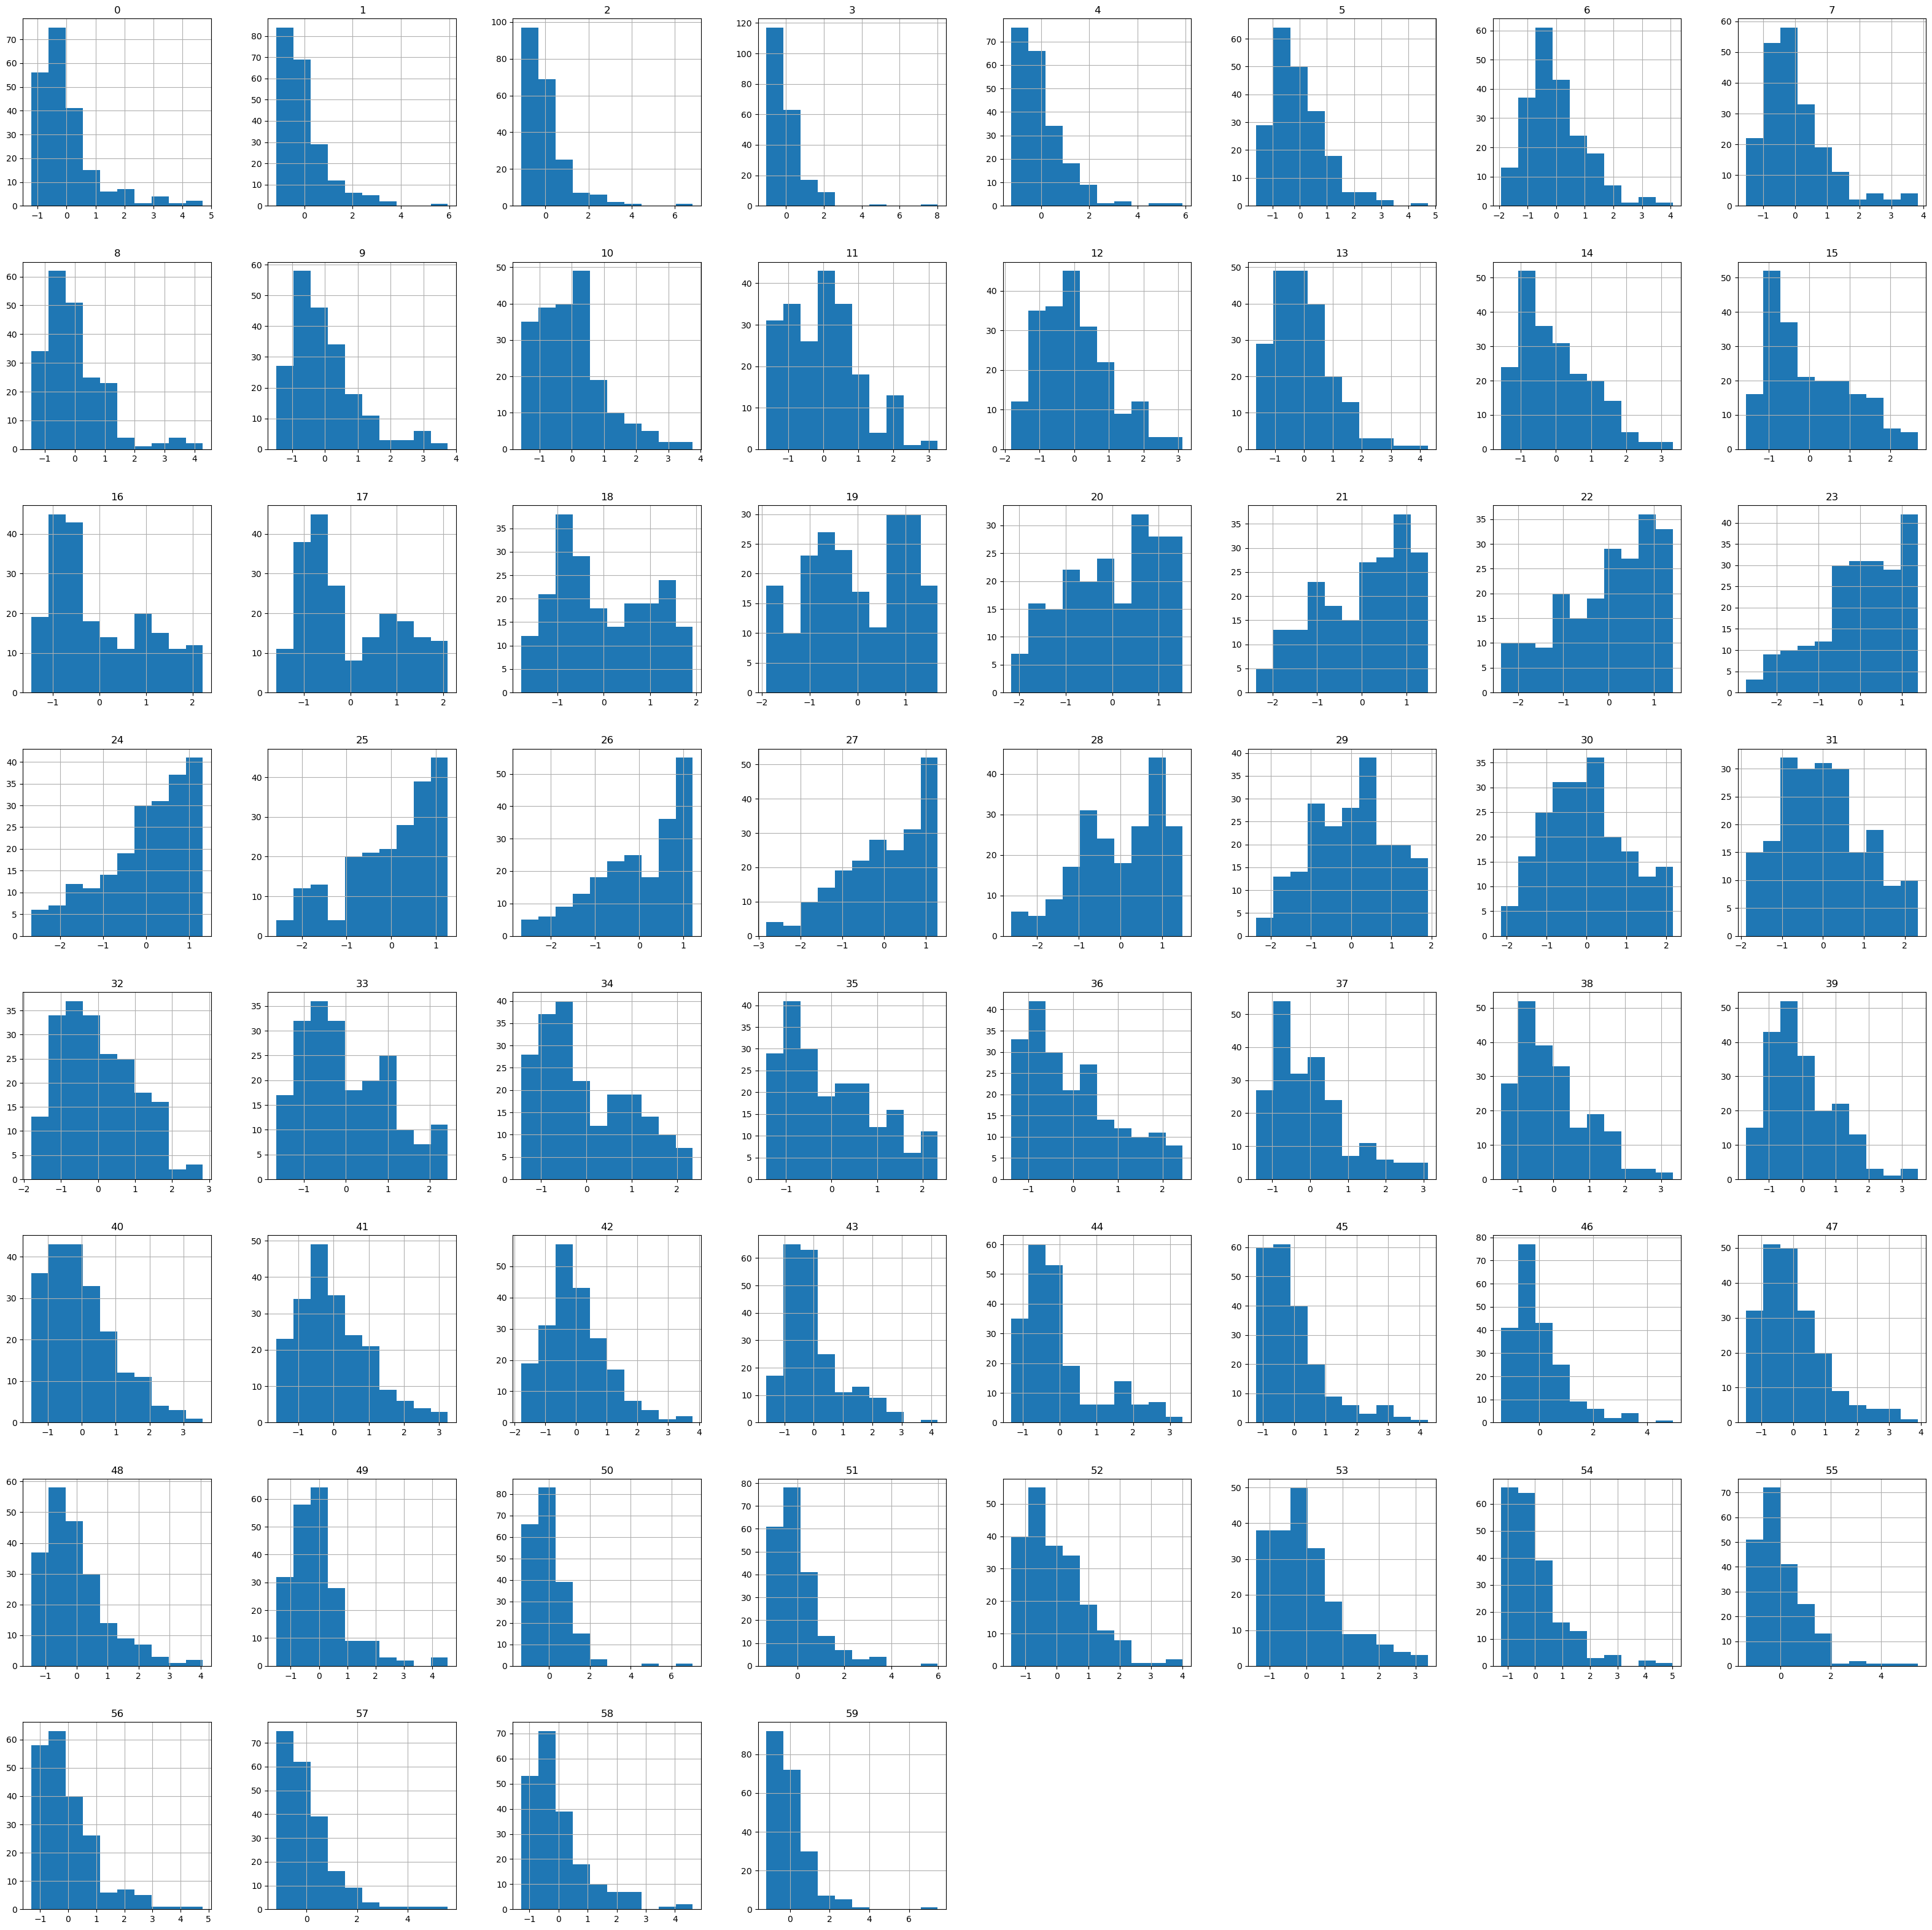

In [ ]:
data2 = pd.DataFrame(data2, dtype="float")
data2.hist(figsize=(40,40))
plt.show()

You can see the x axis now, in each of them mean is close to zero.

But which is the best?

This is unknowable and strongly depends on the problem.

Evaluate models on data prepared with each transform and use the transform or combination of transforms that result in the best performance for your data set on your model.

<h3 style="margin-bottom:0">6) Principal Component Analysis (PCA)</h3>

For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the tutorial is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

When we load our famous iris dataset and look at variables:

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
data.head(5)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


It is a common practice to standardize dataset before doing principal component analysis for the optimal performance. If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data and you can check it <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py"> here </a>. Here, we separate target variable from our data because we want to add it later to our principal components.

In [ ]:
target = data.iloc[:, -1]
data = data.iloc[:, :-1]
data = StandardScaler().fit_transform(data)

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). Here the code projects the original data which is 4 dimensional into 2 dimensions. It should be noted that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, target], axis = 1)

finalDf

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


Now, we can visualize them by:

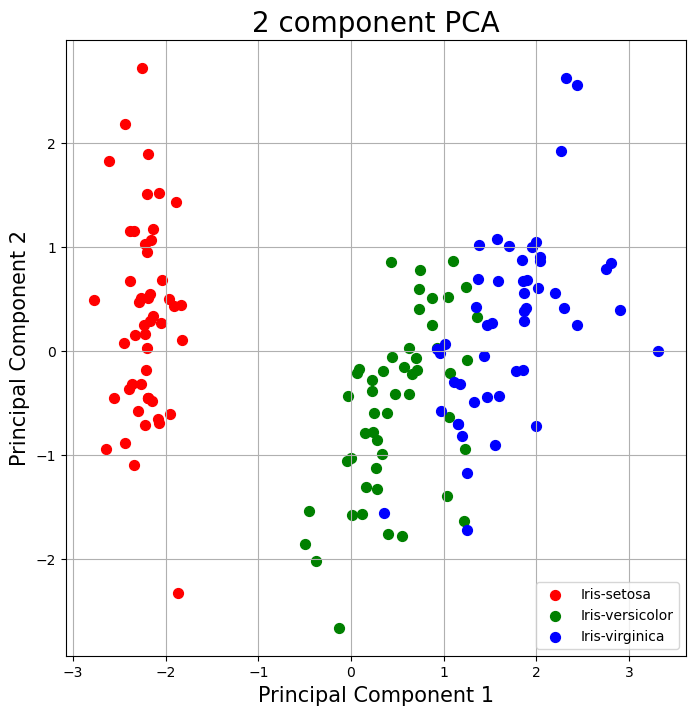

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. So, it is always a good practice to check it.

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

We can see, the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

We will delve into how PCA can improve machine learning algorithms once we learn about some of the algorithms. For now, it is enough for us to know how to implement them.